<a href="https://colab.research.google.com/github/EmjayAhn/study_deeplearning/blob/master/03_Regression_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.enable_eager_execution()
%matplotlib inline

### Linear Regression

Linear Regression은 Neural Network의 가장 기본적인 형태라고 할 수 있다. <br>
Linear Regression의 일반식이라 하면 아래와 같이 표현 할 수 있다<br><br>
\begin{equation}
  y = w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 \dots w_nx_n
\end{equation} <br>


수학에서 항상 "일반"이라는 말이 붙으면 어렵다. <br> 
그래서 이번 예제에서는 아주 간단한 $ y = 2x $ 함수를 학습시켜 볼 것이다

#### example 1

데이터를 아래와 같이 준비한다. <br>
여기선 샘플을 10개로 준비했다. 원한다면 더 많은 샘플을 생성해서 사용해도 문제 없다.

In [29]:
data1 = np.array(list(range(10000)), dtype=np.float32)
data1 = data1 / max(data1)
label1 = 2*data1

print('data \t label')
for d, l in zip(data1, label1):
  print(d, '\t', l)

data 	 label
0.0 	 0.0
0.00010001 	 0.00020002
0.00020002 	 0.00040004
0.00030003 	 0.00060006
0.00040004 	 0.00080008
0.00050005 	 0.0010001
0.00060006 	 0.00120012
0.00070007 	 0.00140014
0.00080008 	 0.00160016
0.00090009003 	 0.0018001801
0.0010001 	 0.0020002
0.00110011 	 0.00220022
0.00120012 	 0.00240024
0.00130013 	 0.00260026
0.00140014 	 0.00280028
0.0015001501 	 0.0030003001
0.00160016 	 0.00320032
0.00170017 	 0.00340034
0.0018001801 	 0.0036003601
0.00190019 	 0.00380038
0.0020002 	 0.0040004
0.00210021 	 0.00420042
0.00220022 	 0.00440044
0.00230023 	 0.00460046
0.00240024 	 0.00480048
0.00250025 	 0.0050005
0.00260026 	 0.00520052
0.00270027 	 0.00540054
0.00280028 	 0.00560056
0.00290029 	 0.00580058
0.0030003001 	 0.0060006003
0.00310031 	 0.00620062
0.00320032 	 0.00640064
0.0033003301 	 0.0066006603
0.00340034 	 0.00680068
0.00350035 	 0.0070007
0.0036003601 	 0.0072007203
0.00370037 	 0.00740074
0.00380038 	 0.00760076
0.0039003901 	 0.0078007802
0.0040004 	 0.00800

이 데이터와 라벨을 좌표 평면에 그려보면 아래와 같이 나타난다. <br> 
우리는 이 데이터를 이용하여 기울기가 2인 직선 즉 $a = 2$ 인 직선의 방정식을 구해내야 하는데, 이런식으로 데이터에 맞는 함수를 찾는 과정을 fitting이라고 하고, 이 fitting을 수행하는 방법론 중 하나가 Regression 이다. <br><br>

우리는 지금부터 이 데이터를 이용하여 $y = ax$ 함수를 fitting 할 것이다.


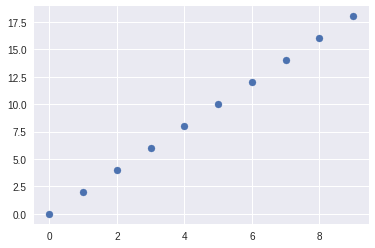

In [3]:
plt.scatter(data1, label1)

모델은 Dense layer를 이용하면 간단하게 구현 할 수 있다. <br>
사실 이 코드를 이해하려면 Dense layer가 뭔지 알아야하는데, 이는 neural network의 구조에 대해 알고 있어야 대충 눈치를 챌 수 있다. <br><br>

지금은 일단 tf.keras.layers.Dense안에 학습시켜야 하는 parameter인 $a$ 하나가 귀엽게 들어가있다고 생각하자<br><br>

이 Dense layer에 inputs이 입력으로 들어가면 내부에서 귀여운 $a$와 곱셈 연산을 해줄 것이다.<br>

모델 설계가 완료되면 tf.keras의 Model을 생성해주고, input과 output을 지정해준다. <br>

In [30]:
inputs = tf.keras.Input(shape=(1,))
out = tf.keras.layers.Dense(1, use_bias=False)(inputs)

model = tf.keras.Model(inputs=inputs, outputs=out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


이제 모델을 학습 시킬 수 있도록 모델을  compile 하는 과정이 필요한데 이 때 optimizer와 loss, metrics가 필요하다. <br><br>

Mean Squared Error (MSE)
\begin{equation}
L = \frac{1}{2m}\sum_{i = 1}^{m}(y_i - \hat{y}_i)^2
\end{equation}

Gradient Descent 
\begin{equation}
w = w^- - \alpha \frac{\partial{L}}{\partial{w}}
\end{equation}

우리는 SGD를 사용 할 것이고, Linear Regression 문제를 풀고 있기 때문에 MSE loss를 사용 할 것이다. <br> 
평가 metric은 여러가지가 있겠지만, 우선 그냥 loss랑 동일한 MSE loss로 사용한다. <br><br>

마지막으로 앞에서 말했던 fitting이라는 것을 진행 할 것인데, fit 함수가 이 역할을 해주는 함수이다. <br>
이 method를 실행시킴과 동시에 비로소 모델이 학습을 시작하는 것이다.<br>
input으로 바로 학습할 데이터를 입력하지 않고 model object의 fit method를 통해 데이터를 받고 이를 Input object로 넘기게 된다. <br><br>

data와 label을 fit method로 넘기면서 epochs를 정해주는데 epoch이란 데이터를 몇번까지 복습 할 것인가를 정해주는  hyper parameter 중 하나이다. <br>
이 예제에서는 10번 반복 학습 하도록 한다. <br><br>

학습을 시작하면 loss라고 출력 되는 수치를 잘 관찰해보자

In [32]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(1e-3),
              loss=tf.keras.losses.mean_squared_error,
              metrics=[tf.keras.metrics.mean_squared_error])
# loss = mean_squared_error
# loss 를 줄이는 방향으로 학습 시키는 것이 MaximumLikelihoodEstimation
# metrics


model.fit(data1, label1, epochs=50)

Epoch 1/50
10000/10000 [==============================] - 1s 103us/sample - loss: 1.1701e-09 - mean_squared_error: 1.1701e-09
Epoch 2/50
10000/10000 [==============================] - 1s 92us/sample - loss: 1.1701e-09 - mean_squared_error: 1.1701e-09
Epoch 3/50
10000/10000 [==============================] - 1s 92us/sample - loss: 1.1701e-09 - mean_squared_error: 1.1701e-09
Epoch 4/50
10000/10000 [==============================] - 1s 91us/sample - loss: 1.1657e-09 - mean_squared_error: 1.1657e-09
Epoch 5/50
10000/10000 [==============================] - 1s 92us/sample - loss: 1.1596e-09 - mean_squared_error: 1.1596e-09
Epoch 6/50
10000/10000 [==============================] - 1s 94us/sample - loss: 1.1560e-09 - mean_squared_error: 1.1560e-09
Epoch 7/50
10000/10000 [==============================] - 1s 89us/sample - loss: 1.1498e-09 - mean_squared_error: 1.1498e-09
Epoch 8/50
10000/10000 [==============================] - 1s 90us/sample - loss: 1.1467e-09 - mean_squared_error: 1.1467e-09

학습이 다 되었다면 이 모델이 내가 원하는 동작을 실제로 하는지 확인 할 필요가 있다. <br>
우린 $y = 2x$ 함수를 기대하고 학습을 시켰으므로, 이 모델에 $x$를 넣으면 $2x$를 출력해주면 된다

In [33]:
pred1 = model.predict(data1)

print('data', '\t','label', '\t', 'pred')
for d, l, p in list(zip(data1, label1, pred1))[:10]:
  print(d, '\t', l, '\t', p)

data 	 label 	 pred
0.0 	 0.0 	 [0.]
0.00010001 	 0.00020002 	 [0.00020001]
0.00020002 	 0.00040004 	 [0.00040003]
0.00030003 	 0.00060006 	 [0.00060004]
0.00040004 	 0.00080008 	 [0.00080006]
0.00050005 	 0.0010001 	 [0.00100007]
0.00060006 	 0.00120012 	 [0.00120009]
0.00070007 	 0.00140014 	 [0.0014001]
0.00080008 	 0.00160016 	 [0.00160011]
0.00090009003 	 0.0018001801 	 [0.00180013]


pred 값이 label과 일치하는지 확인해보면 거의 일치하지만 정확히 일치하진 않는다. <br> 
이는 Regression 자체가 근사값 추정 방법이기 때문에 이같이 딱 떨어지는 값을 보기는 어렵다<br><br>

이 쯤 되면 실제로 $a$값이 2가 됐을까 하는 궁금증이 생길 수 있는데, 결과만 보면 $a$값이 2에 가까운 수로 수렴했다고 추정 할 수 있다. 실제로 $a$값을 보려면 아래와 같이 코딩해주면 된다.<br>
이 모델에서는 input이 layer[0] 이기 때문에 실제 parameter가 있는 layer는 1부터 접근해주면 된다.<br><br>

실제로 $a$ 값이 2에 근사한 것을 볼 수 있다.

In [26]:
print(model.layers[1].weights)

[<tf.Variable 'dense_5/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.26452696]], dtype=float32)>]


In [34]:
print(model.layers[1].weights)

[<tf.Variable 'dense_6/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9999424]], dtype=float32)>]


여기서 하나의 의심을 해볼 수 있는데 학습시킨 데이터는 실제로 학습을 했으니까 맞출 수 있지만 만약 학습하지 않은 데이터를 입력하면 비슷한 결과를 얻을 수 있을까? <br><br>

실제로 이같은 검증을 하게 되는데 이를 evaluation이라고 하고, 이 때 사용된 train data외의 데이터를 (cross) validation dataset 이라고 한다. <br><br>

사람으로 비유하면 일종의 문제지라고 보면 쉽다.<br>
문제지에는 항상 답지가 있고 문제를 풀어서 답지를 확인하여 내 실력을 확인한다. <br> <br>

결과를 보면 제법 잘 맞추긴 하지만 실제로 일반적인 모델은 매우 복잡하므로 이렇게 에쁘게 나오지는 않는다. <br>
물론 일반적인 모델을 이같이 학습되도록 설계하는 것이 이상적인 목표임에는 틀림없다.

In [36]:
data11 = np.array(range(10, 20), np.float32)
label11 = 2*data11

pred11 = model.predict(data11)

print('data', '\t','label', '\t', 'pred')
for d, l, p in list(zip(data11, label11, pred11))[:10]:
  print(d, '\t', l, '\t', p)

data 	 label 	 pred
10.0 	 20.0 	 [19.999424]
11.0 	 22.0 	 [21.999367]
12.0 	 24.0 	 [23.99931]
13.0 	 26.0 	 [25.999252]
14.0 	 28.0 	 [27.999193]
15.0 	 30.0 	 [29.999136]
16.0 	 32.0 	 [31.999079]
17.0 	 34.0 	 [33.99902]
18.0 	 36.0 	 [35.998962]
19.0 	 38.0 	 [37.998905]


In [42]:
print(a)

[<tf.Variable 'dense_6/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9999424]], dtype=float32)>]


In [44]:
print(a[0].numpy())

[[1.9999424]]


In [45]:
print(a[0].numpy()[0][0])

1.9999424


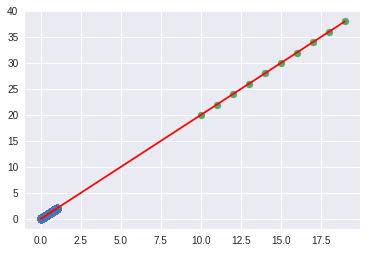

In [40]:
a = model.layers[1].weights
plt.scatter(data1, label1)
plt.scatter(data11, label11)
plt.plot([a[0].numpy()[0, 0]*i for i in range(20)], 'r')

#### example 2

이번에는 $y = 2x$ 처럼 단항식이 아닌 다항식 형태 즉, 일반식의 형태로 보이는 Linear Regression 문제를 풀어본다.

\begin{equation}
y = w_0x_0 + w_1x_1 + w_2x_2 +w_3x_3 \dots w_nx_n
\end{equation} \\

단항식과 차이는 입력으로 들어가는 수가 scalar가 아닌 vector 형태로 들어가게 된다. <br>
사실 앞서 학습시킨 데이터도 scalar가 들어갔다고 생각하는 것 보단 1차원 vector가 들어갔다고 보는게 더 맞을 수도 있겠다<br><br>

여기서 $w_0x_0$항의 경우 $x_0 = 1$로 취급하는 것이 일반적이다. <br>
그럼 결국 $w_0 = w_0x_0$을 만족하는데 이 때 $w_0$는 우리가 알고있는 1차 함수의 일반식인 $y = ax + b$에서 $b$에 해당하는 항이라고 볼 수 있다. 이를 bias라고 지칭한다. <br>
이 bias를 고려했을 때 우리가 설계할 모델은 실제로 이런 모양이 된다<br>
\begin{equation}
y = w_1x_1 + w_2x_2 + w_3x_3 \dots w_{10}x_{10} + b
\end{equation}

이 모델을 이용하여 우리는 입력 벡터의 총 합을 구하는 모델을 학습시킬 것이다. <br>
다음과 같이 입력의 수는 10개 즉 10차원 벡터로 이루어진 데이터를 1000개 샘플로 만들어준다. <br>

In [46]:
data2 = np.random.randint(1, 10, size=(1000, 10)).astype(np.float32)
label2 = np.sum(data2, axis=1)

print('data', '\t\t\t', 'label')
for d, l in list(zip(data2, label2))[:10]:
  print(d, '\t', l)

data 			 label
[9. 8. 8. 8. 6. 3. 6. 6. 7. 5.] 	 66.0
[1. 8. 6. 1. 7. 7. 9. 9. 1. 3.] 	 52.0
[9. 6. 1. 6. 4. 2. 4. 8. 5. 6.] 	 51.0
[7. 5. 8. 2. 7. 3. 6. 4. 6. 7.] 	 55.0
[1. 8. 1. 1. 9. 7. 9. 1. 2. 9.] 	 48.0
[8. 3. 2. 7. 6. 3. 5. 8. 5. 8.] 	 55.0
[6. 7. 1. 3. 4. 6. 1. 8. 9. 2.] 	 47.0
[5. 2. 4. 3. 5. 7. 4. 8. 7. 6.] 	 51.0
[4. 4. 1. 7. 5. 8. 6. 8. 6. 4.] 	 53.0
[9. 6. 4. 5. 8. 6. 6. 6. 1. 9.] 	 60.0


입력의 차원이 10으로 늘어났으므로, input layer의 크기를 10으로 지정해준다 <br>
나머지는 단항식으로 모델을 만들 때와 동일하다. <br>
약간의 차이가 있다면 단항식으로 만들었을 때는 $a$가 귀엽게 하나 들어가 있었다면 이번에는 parameter가 좀 많아진 것을 볼 수 있다. <br>
당연하게도 10개의 입력이 들어갔으니 각각에 연결되는 10개의 weight parameter와 bias에 해당하는 parameter 1개 총 11개의 parameter를 볼 수 있다.

In [47]:
inputs = tf.keras.Input(shape=(10,))
out = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=out)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


fitting 할 때 샘플이 1000개가 한 번에 들어가면 컴퓨터가 매우 괴로워하므로, 한 번에 학습시킬 데이터 샘플 수를 정 할 수 있다. 이를 mini batch라고 하는데, 통상 이 mini batch를 batch라고 부른다. <br>
전체 데이터를 의미하는건 full batch로 구분하면 된다. <br><br>
이 batch에 들어갈 샘플 수를 정해주면 되는데 fit method에 batch_size라는 argument를 활용하면 된다.<br>
그럼 이 batch로 쪼개진 데이터들이 학습을 반복하면서 1000개가 모두 들어가면 이를 1 epoch라고 한다. <br><br>

실제 fitting을 시켜서 logging되는 정보를 관찰해보면 어떤 의미인지 쉽게 알 수 있다.

In [48]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(1e-4),
             loss=tf.keras.losses.mean_squared_error,
             metrics=[tf.keras.metrics.mean_squared_error])

model.fit(data2, label2, epochs=100, batch_size=32)

Epoch 1/100
1000/1000 [==============================] - 0s 245us/sample - loss: 736.5864 - mean_squared_error: 736.5865
Epoch 2/100
1000/1000 [==============================] - 0s 92us/sample - loss: 31.4104 - mean_squared_error: 31.4104
Epoch 3/100
1000/1000 [==============================] - 0s 96us/sample - loss: 8.5157 - mean_squared_error: 8.5157
Epoch 4/100
1000/1000 [==============================] - 0s 118us/sample - loss: 7.2086 - mean_squared_error: 7.2086
Epoch 5/100
1000/1000 [==============================] - 0s 92us/sample - loss: 6.5915 - mean_squared_error: 6.5915
Epoch 6/100
1000/1000 [==============================] - 0s 91us/sample - loss: 6.0368 - mean_squared_error: 6.0368
Epoch 7/100
1000/1000 [==============================] - 0s 95us/sample - loss: 5.5337 - mean_squared_error: 5.5337
Epoch 8/100
1000/1000 [==============================] - 0s 92us/sample - loss: 5.0859 - mean_squared_error: 5.0859
Epoch 9/100
1000/1000 [==============================] - 0s 87us

loss를 관찰 해봤을 때 loss 값이 매우 큰데다가 학습이 진행되더라도 거의 수렴을 하지 않는 모습을 관찰 할 수 있다. <br>
이는 모델이 우리가 풀고자 하는 연산을 충분히 표현해내지 못한다는 것을 알 수 있고, 기대하는 기능이 모델이 가진 복잡성보다 훨씬 복잡한 문제라는 것을 의미한다. <br> <br>

이 처럼 어떤 문제를 풀고자 할 때, 모델이 가지는 복잡성과 문제가 가지는 복잡성을 파악 할 수 있는 직관이 매우 중요하다. <br>
문제가 복잡하면 모델이 복잡하던지 문제를 단순화 시킬 수 있는 데이터셋이 존재해야하는데, 이를 연구하는 것이 데이터사이언티스트의 역할일 것이다.<br>
물론 이 문제를 풀 수 있는 방법이 없진 않지만, 이 후에 배우는 내용들을 습득하여 이 문제에 다시 적용시켜보는 것도 좋은 공부가 될 수 있을 것 같다.<br><br>
물론 학습이 잘 안됐으므로, 결과가 아래와 같이 제대로 나오지 않는다.

In [49]:
pred2 = model.predict(data2)
                    
print('data', '\t\t\t', 'label', '\t', 'result')
for d, l, r in list(zip(data2, label2, pred2))[:10]:
  print(d, '\t', l, '\t', r)

data 			 label 	 result
[9. 8. 8. 8. 6. 3. 6. 6. 7. 5.] 	 66.0 	 [65.96007]
[1. 8. 6. 1. 7. 7. 9. 9. 1. 3.] 	 52.0 	 [51.934223]
[9. 6. 1. 6. 4. 2. 4. 8. 5. 6.] 	 51.0 	 [51.01344]
[7. 5. 8. 2. 7. 3. 6. 4. 6. 7.] 	 55.0 	 [55.036]
[1. 8. 1. 1. 9. 7. 9. 1. 2. 9.] 	 48.0 	 [47.980896]
[8. 3. 2. 7. 6. 3. 5. 8. 5. 8.] 	 55.0 	 [55.04112]
[6. 7. 1. 3. 4. 6. 1. 8. 9. 2.] 	 47.0 	 [47.0027]
[5. 2. 4. 3. 5. 7. 4. 8. 7. 6.] 	 51.0 	 [51.031452]
[4. 4. 1. 7. 5. 8. 6. 8. 6. 4.] 	 53.0 	 [52.9597]
[9. 6. 4. 5. 8. 6. 6. 6. 1. 9.] 	 60.0 	 [59.995926]


### Logistic Regression

아주 일반적인 Linear Regression 문제는 문제 특성상 많은 문제를 풀기는 어렵다. <br>
쉽게 얘기하면 모델의 출력 boundary가 $(-\infty, \infty)$ 이므로 최적화 할 parameter의 boundary도 커질 수 밖에 없는데, 이러한 현상은 학습을 매우 어렵게 만든다. <br><br>
그래서 일반적으로 Regression을 할 때는 단순한 Linear Regression 보다 출력의 범위가 정해진 함수를 사용하여 출력을 어떤 범위 내로 제한시키고 학습을 하게 되는데, Logistic Regression은 (0, 1)의 범위를 가지는 sigmoid 함수를 사용한다. <br><br>

이 sigmoid function을 이용하여 Logistic Regression의 일반식을 써보면 다음과 같다.
\begin{equation}
y = \sigma(w_1x_1 + w_2x_2+w_3x_3 + \dots + w_nx_n + b)
\end{equation}

sigmoid 함수는 이렇게 생겼다.


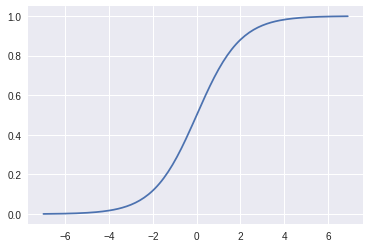

In [0]:
x = np.arange(-7, 7, 0.1)
sigmoid = tf.nn.sigmoid(x).numpy()    # tensorflow에서 sigmoid function을 builtin function으로 지원한다.
plt.plot(x, sigmoid)

#### example 3

Logistic Regression 이름 그대로 Logistic 문제를 풀기위한 목적으로 사용된다. <br>
Logistic이라 함은 2진 출력(binary output)을 기대하는 모델을 의미한다. <br><br>

그래서 이 Logistic Regression 모델을 학습시키기 위해서는 라벨이 2진라벨(0 or 1)이어야 한다.<br>
이 예제에서는 0 ~ 9까지 상승하는 수열과 9~0까지 하강하는 수열을 1과  0으로 구분하는 모델을 작성해본다.<br><br>

데이터 준비는 다음과 같이 해주면 되겠다.

In [50]:
up = [i for i in range(10)]
down = [9-i for i in range(10)]
data3 = np.array([up if i%2 == 0 else down for i in range(1000)], np.float32)
label3 = np.array([[1] if i%2 == 0 else [0] for i in range(1000)], np.float32)

for d, l in list(zip(data3, label3))[:10]:
  print(d, l)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [1.]
[9. 8. 7. 6. 5. 4. 3. 2. 1. 0.] [0.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [1.]
[9. 8. 7. 6. 5. 4. 3. 2. 1. 0.] [0.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [1.]
[9. 8. 7. 6. 5. 4. 3. 2. 1. 0.] [0.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [1.]
[9. 8. 7. 6. 5. 4. 3. 2. 1. 0.] [0.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [1.]
[9. 8. 7. 6. 5. 4. 3. 2. 1. 0.] [0.]


마찬가지로 Dense layer를 이용해 모델을 구성해주는데 여기서 한가지 달라지는 점은 activation이 들어간다는 점이다. <br>
Neural Network 관점에서 이렇게 선형 모델을 비선형 모델로 사상해주는 함수를 activation function이라고 명한다.<br>
우리는 Neural Network를 공부할거니까 sigmoid function 같은 녀석들을 activation function이라고 부르도록 하자.

In [51]:
inputs = tf.keras.Input(shape=(10,))
out = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


Logistic Regression을 하기 위해서는 Linear Regression 과는 조금 다른 loss function이 필요하다. <br>

Binary crossentropy

\begin{equation}
L = \sum_{i = 1}^{n}[-y_i\log{(\hat{y_i})} - (1-y_i)\log{(1-\hat{y_i})}]
\end{equation}

또한 Linear Regression에서는 평가 metric을 loss와 동일하게 사용했지만, Logistic Regression에서는 일종의 classifier로 동작하기 때문에 classification 에서 사용하는 평가 metric인 accuracy를 사용 할 수 있다.<br><br>

accuracy는 주어진 validation set 대비 맞춘 갯수의 비율이다.

In [56]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(1e-4),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.binary_accuracy])
# metric은 [] list 로 여러개를 넣을 수 있다.

model.fit(data3, label3, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 298us/sample - loss: 1.5618 - binary_accuracy: 0.0000e+00
Epoch 2/10
1000/1000 [==============================] - 0s 105us/sample - loss: 1.4044 - binary_accuracy: 0.0000e+00
Epoch 3/10
1000/1000 [==============================] - 0s 104us/sample - loss: 1.2616 - binary_accuracy: 0.0000e+00
Epoch 4/10
1000/1000 [==============================] - 0s 99us/sample - loss: 1.1329 - binary_accuracy: 0.0000e+00
Epoch 5/10
1000/1000 [==============================] - 0s 118us/sample - loss: 1.0181 - binary_accuracy: 0.0000e+00
Epoch 6/10
1000/1000 [==============================] - 0s 105us/sample - loss: 0.9165 - binary_accuracy: 0.0000e+00
Epoch 7/10
1000/1000 [==============================] - 0s 104us/sample - loss: 0.8271 - binary_accuracy: 0.0000e+00
Epoch 8/10
1000/1000 [==============================] - 0s 103us/sample - loss: 0.7487 - binary_accuracy: 0.0190
Epoch 9/10
1000/1000 [==============================] - 0s 112us/samp

loss를 관찰해보면 이전과 마찬가지로 일정 수치 이하로 떨어지지 않는다. <br>
accuracy도 0.5라는 것은 OX문제에서 둘 중 하나만 쭉 찍고 있다는 것으로 해석할 수 있다.<br><br>

어떻게된게 $y=2x$ 이후로 성공한 예제가 없다. <br>
우리가 예제로 마주했던 문제 자체가 사실 Linear, Logistic Regression으로 풀어선 안되는 문제들이다. <br>
일반식과 데이터를 잘 분석해서 왜 그런지 확인해보는 것도 좋은 공부방법이 될 수 있다. <br><br>

굳이 잘 안되는 문제를 여기서 풀어본 이유는 이 문제를 Neural Network로도 한 번 풀어보고 비교 분석 해보는 기회가 있으면 좋을 것 같다는 생각에서 선택하게 됐다. <br> <br>

앞서 문제의 복잡도와 모델의 복잡도에 대한 이야기를 했는데, 동일한 데이터에 대해 Neural Network를 활용하면 이 모델의 복잡도를 제어하고, 통제할 수 있다. 

In [57]:
pred3 = model.predict(data3)

print('data', '\t\t\t\t\t', 'label', '\t', 'result')
for d, l, r in list(zip(data3, label3, pred3))[:10]:
  print(d, '\t', l, '\t', r)

data 					 label 	 result
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] 	 [1.] 	 [0.56213]
[9. 8. 7. 6. 5. 4. 3. 2. 1. 0.] 	 [0.] 	 [0.4539624]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] 	 [1.] 	 [0.56213]
[9. 8. 7. 6. 5. 4. 3. 2. 1. 0.] 	 [0.] 	 [0.4539624]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] 	 [1.] 	 [0.56213]
[9. 8. 7. 6. 5. 4. 3. 2. 1. 0.] 	 [0.] 	 [0.4539624]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] 	 [1.] 	 [0.56213]
[9. 8. 7. 6. 5. 4. 3. 2. 1. 0.] 	 [0.] 	 [0.4539624]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] 	 [1.] 	 [0.56213]
[9. 8. 7. 6. 5. 4. 3. 2. 1. 0.] 	 [0.] 	 [0.4539624]


In [0]:
# 